In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [132]:
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [133]:
X = df.iloc[:, 5:]
y = df['artist']

In [134]:
X.head()

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [136]:
X_train.shape, X_test.shape

((270, 5), (90, 5))

In [137]:
max_depth_values = range(1, 100)

In [138]:
scores_data = pd.DataFrame()

In [139]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [140]:
scores_data

,max_depth,train_score,test_score
0,1,0.603704,0.666667
0,2,0.685185,0.744444
0,3,0.737037,0.777778
0,4,0.748148,0.800000
0,5,0.751852,0.777778
...,...,...,...
0,95,0.996296,0.788889
0,96,0.996296,0.788889
0,97,0.996296,0.800000
0,98,0.996296,0.788889


In [141]:
best_result = scores_data.sort_values('test_score', ascending=False).head(1)
best_result

,max_depth,train_score,test_score
0,44,0.996296,0.822222


In [142]:
depth = best_result['max_depth'].values[0]
depth

44

In [143]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=44)

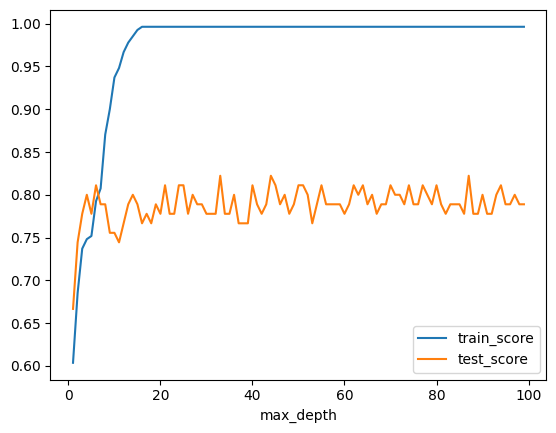

In [144]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score']);

In [145]:
predictions = clf.predict(X_test)

In [147]:
precision = precision_score(y_test, predictions, average='micro')
precision

0.8111111111111111